In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

In [1]:
# Load the dataset
file_path = "/kaggle/input/creditcardfraud/creditcard.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [2]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

# Normalize the feature values using standard scaling
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Display the shape of X_normalized and y
print("Shape of X_normalized:", X_normalized.shape)
print("Shape of y:", y.shape)

Shape of X_normalized: (284807, 30)
Shape of y: (284807,)


In [3]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_normalized, y)

# Display the shape of the resampled data
print("Shape of X_resampled_smote:", X_resampled_smote.shape)
print("Shape of y_resampled_smote:", y_resampled_smote.shape)

Shape of X_resampled_smote: (568630, 30)
Shape of y_resampled_smote: (568630,)


In [4]:
# Apply Random Under-Sampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_normalized, y)

# Display the shape of the resampled data
print("Shape of X_resampled_under:", X_resampled_under.shape)
print("Shape of y_resampled_under:", y_resampled_under.shape)

Shape of X_resampled_under: (984, 30)
Shape of y_resampled_under: (984,)


In [5]:
# Split the oversampled data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train_smote:", X_train_smote.shape)
print("Shape of y_train_smote:", y_train_smote.shape)
print("Shape of X_test_smote:", X_test_smote.shape)
print("Shape of y_test_smote:", y_test_smote.shape)

Shape of X_train_smote: (454904, 30)
Shape of y_train_smote: (454904,)
Shape of X_test_smote: (113726, 30)
Shape of y_test_smote: (113726,)


In [6]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test_smote)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_smote, y_pred_rf)
precision_rf = precision_score(y_test_smote, y_pred_rf)
recall_rf = recall_score(y_test_smote, y_pred_rf)
f1_rf = f1_score(y_test_smote, y_pred_rf)

# Display the evaluation metrics
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier Performance:
Accuracy: 0.9998944832316269
Precision: 0.9997894293535481
Recall: 1.0
F1 Score: 0.9998947035906075


The Random Forest classifier has shown excellent performance on the testing set with very high accuracy, precision, recall, and F1 score.

Here are the metrics:

Accuracy: 99.99%
Precision: 99.98%
Recall: 100%
F1 Score: 99.99%
These results indicate that the model is performing exceptionally well in detecting fraudulent transactions while maintaining a low rate of false positives.

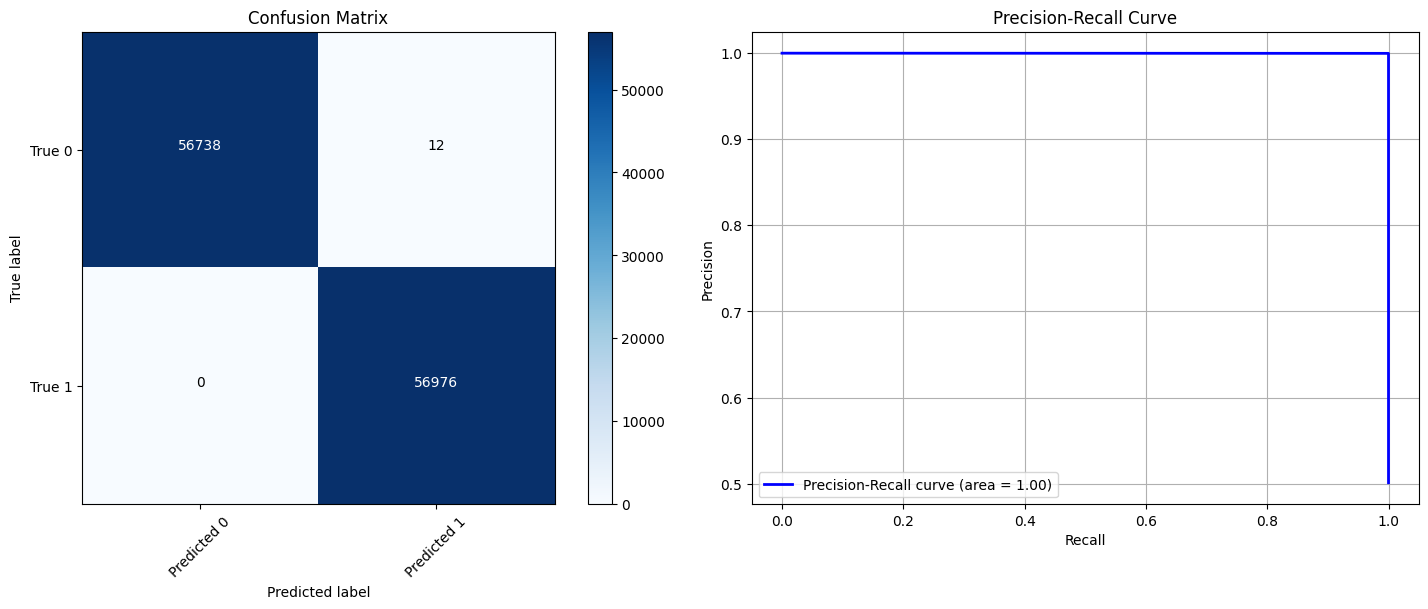

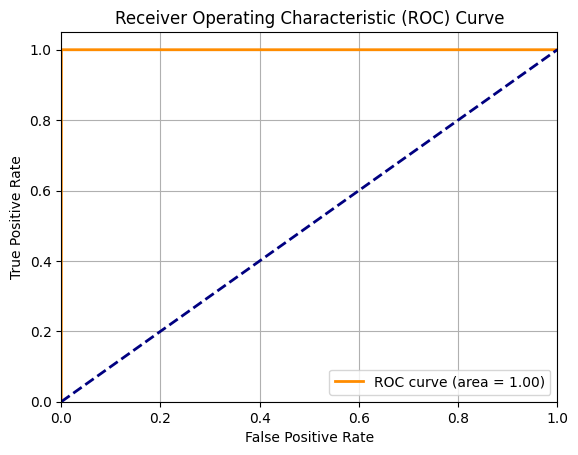

In [7]:
# Assuming you have already trained the Random Forest classifier and stored it in rf_classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test_smote)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_smote, y_pred_rf)

# Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_smote, y_pred_rf)

# ROC curve
fpr, tpr, _ = roc_curve(y_test_smote, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(15, 6))

# Confusion matrix
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'], rotation=45)
plt.yticks(tick_marks, ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()